In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

/tmp/ipykernel_55178/2026922495.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


### A function that creates and trains the model

In [11]:
def buildAndTrainTheModel(x,y):
    # build the model
    ANNreg=nn.Sequential(
        nn.Linear(1,1), # input
        nn.ReLU(), # activation
        nn.Linear(1,1) # output
    )

    # loss and optimizer functions
    lossfun=nn.MSELoss()
    optimizer=torch.optim.SGD(ANNreg.parameters(),lr=.05)

    ### train the model
    num_epochs=500
    losses=torch.zeros(num_epochs)

    # Train Fr
    for epochi in range(num_epochs):
        # fwd pass
        yHat=ANNreg(x)

        # compute loss
        loss=lossfun(yHat,y)
        losses[epochi]=loss

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    #end train loop

    ###compute predictions
    predictions=ANNreg(x)

    return predictions,losses

### A function that creates the data

In [12]:
def createTheData(m):
    N=50
    x=torch.randn(N,1)
    y=m*x+torch.randn(N,1)/2
    return x,y

### Test it once

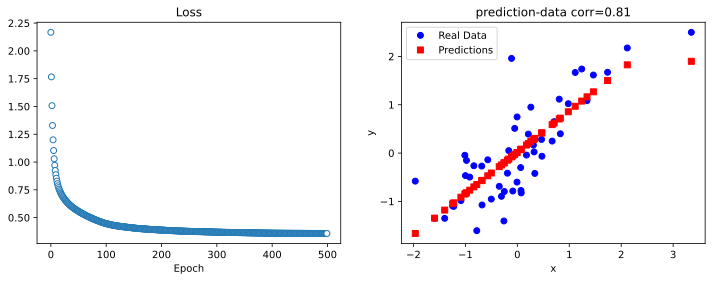

In [13]:
# create dataset
x,y=createTheData(.8)

# run the model
yHat,losses=buildAndTrainTheModel(x,y)

fig,ax=plt.subplots(1,2,figsize=(12,4))

ax[0].plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x,y,'bo',label='Real Data')
ax[1].plot(x,yHat.detach(),'rs',label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'prediction-data corr={np.corrcoef(y.T,yHat.detach().T)[0,1]:.2f}')
ax[1].legend()

plt.show()

### Now for experiment

In [14]:
slopes=np.linspace(-2,2,21)

numExp=50

results=np.zeros((len(slopes),numExp,2))

for slopei in range(len(slopes)):
    for N in range(numExp):
        # create data, run model
        x,y=createTheData(slopes[slopei])
        yHat,losses=buildAndTrainTheModel(x,y)

        # store the final loss and preformance
        results[slopei,N,0]=losses[-1]
        results[slopei,N,1]=np.corrcoef(y.T,yHat.detach().T)[0,1]

# correlation can be 0 if model didnt do well. set nan->0
results[np.isnan(results)]=0

/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


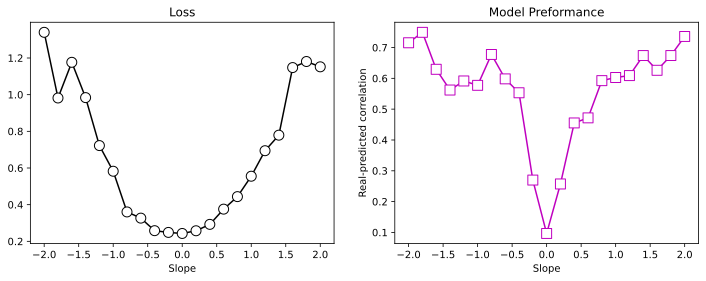

In [16]:
# plot the results

fig,ax=plt.subplots(1,2,figsize=(12,4))

ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted correlation')
ax[1].set_title('Model Preformance')

plt.show()

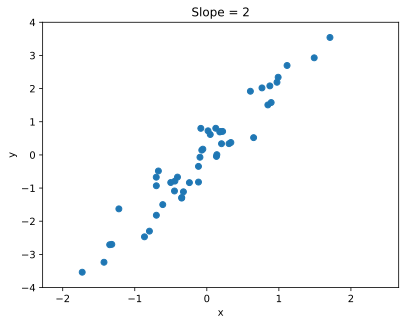

In [17]:
# visualize slope

m=2

x,y=createTheData(m)

plt.title('Slope = ' + str(m))
plt.plot(x,y,'o')
plt.ylim([-4,4])
plt.xlabel('x')
plt.ylabel('y')
plt.show()